In [1]:
# Import 3rd-party frameworks.

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import time as tm
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
from Mike_NB_01 import *

In [3]:
# Import the Bot engine.
import sys 
sys.path.append('..')
from ___Engine import *
sys.path.append('../Exchange')
from Utility import *

Engine.ChooseMode(stream=False, show_stream=False, demisser=False, show_demosser=False, traders=True, show_tranders=False, present=True )
engine = Engine()
engine.Start(Config['structure'], Config['timing'])

bn = None
if len(engine.exchanges) > 0:
    bn = engine.exchanges[0]  # Binance exchange

====== Bot: engine is created.
====== Bot: engine is starting...
Initializing Binance singleton...
====== Bot: Traders, and their strategies/indicators, are created.
====== Bot: Traders, and their strategies/indicators, are running...


In [4]:
# Get_Price_Data_By_Time function seamlessly collects/creates price candles from Binance.

start = datetime(2022, 1, 1)    # Any datetime. Note Binance started operation in July 2017.
end = datetime(2023, 3, 16)     # Any datetime
symbol = "BTCUSDT"      # Any pair listed on Binance.
interval = Config['ginterval']    # in '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d'.  (excludes: '3d', '1w')
prePad = True           # prepend with null candles.
#------------------------------------------------------------------------------------------------------------------
candles, nFills, successful, _, reason = bn.Get_Price_Data_By_Time("klines", symbol, interval, start, end, prePad=prePad)
print(reason)
if successful:          # price is a numpy array.
    print("\n!!!!!!!!!! (nCandles, nAttributes) = {}, nCreated = {}".format(candles.shape, nFills))


Get_Price: klines.BTCUSDT.12h.2022-01-01 00:00:00.2023-03-16 00:00:00
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/

../Exchange/Binance.py:1313: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  dynarray[dynarray == '12.12.03000000'] = 0.0    # AliceUSDT.3m


In [5]:
# Get_Price_Data_By_Time_Batch function executes a batch of Get_Price_Data_By_Time calls.

start = datetime(2023, 1, 1)
end = datetime(2023, 3, 16)
symbols = ["BTCUSDT", "ETHUSDT"]    # Be careful with market symbols.
interval = Config['ginterval']
#-------------------------------------------------------------------------------------------------------
table, nFills, successful_symbols, succesful, = bn.Get_Price_Data_By_Time_Batch("klines", symbols, interval, start, end)
if succesful:   # table is a numpy array.
    print("\n!!!!!!!!!! (nMarkets, nCandles, nAttributes) = {}, nCreated = {}".format(table.shape, nFills))
    print("\n!!!!!!!!!! successful: {}".format(successful_symbols))

Walking through the list...

Get_Price: klines.BTCUSDT.12h.2023-01-01 00:00:00.2023-03-16 00:00:00
Extrapolated candles will be created if initial candles are not available...
BTCUSDT: 149, 0 created. Success. 1-th.

Get_Price: klines.ETHUSDT.12h.2023-01-01 00:00:00.2023-03-16 00:00:00
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-

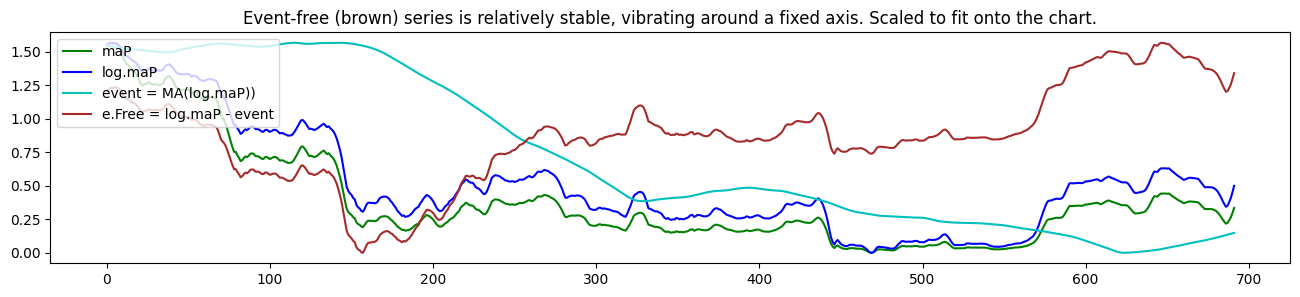

In [6]:
# Assess if event-free series has significance, and at what sigma values.

smallSigma = 3
largeSigma = 60
nLatest = 1440 * 10   # the number of candles to show.
#-----------------------------------------------------------------
Event_Free_Learning_Scheme_10(candles, smallSigma, largeSigma, nLatest)

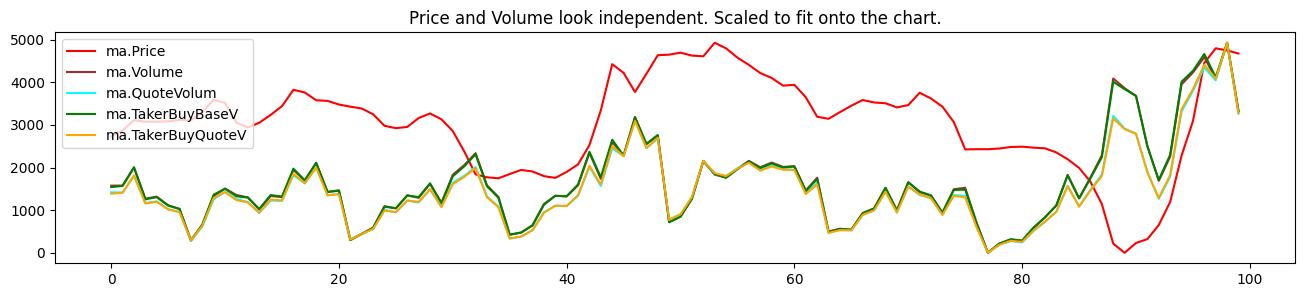

In [7]:
# Guess the best sigma for price and volume

pSigma = 1
vSigma = 1
nLatest = 100  # minutes in a day.
#-------------------------------------------------------------------
Show_Price_Volume_10(candles, pSigma, vSigma, nLatest)

In [8]:
# Get the latest pirces, so quickly as to draw and monitor all 330 -/USDT markets on Binance in real time.
# Note: It will not work during its a few minutes of warming-up period.

nLatest = 2 #3000000    # number of latest cached candles. It's completely normal if one less candles are returned.
#--------------------------------------------------------------

end = datetime.now() # datetime(2023, 2, 20)
start = end - timedelta(minutes=nLatest-1, hours=0)
symbol = "ETHUSDT"; interval = Config['ginterval']
cachedCandles = bn.Get_Cached_Price("klines", symbol, interval, start)
if cachedCandles is not None:
    series = [ (cachedCandles[:,4], "price", "b") ]
    ShowSingle("Latest {} prices.".format(cachedCandles.shape[0]), [(cachedCandles[:,4], "price", "b")])

In [9]:
# Logarithm for placeholder candles ...

In [10]:
# Visualization 01

In [11]:
ready = bn.gstreams_ready
keys = []
while len(keys) < 320:
    tm.sleep(3)
    keys = bn.gstreams.keys()
print(ready, len(keys))

False 342


In [ ]:
# Get_Price_Data_By_Time_Batch function executes a batch of Get_Price_Data_By_Time calls.

start = datetime(2018, 1, 1)
# start = datetime(2023, 4, 1)
end = get_current_day_start( datetime.now() ) - timedelta(days=1, minutes=1)

keys = bn.gstreams.keys()
symbols = []
for key in keys:
    (dataType, symbol, interval) = key.split('.')
    symbols.append(symbol)
print(symbols, len(symbols))

interval = Config['ginterval']
#-------------------------------------------------------------------------------------------------------
table, nFills, reports, succesful = bn.Get_Price_Data_By_Time_Batch("klines", symbols, interval, start, end, lookup=True)
if succesful:   # table is a numpy array.
    print("\n!!!!!!!!!! (nMarkets, nCandles, nAttributes) = {}, nCreated = {}".format(table.shape, nFills))
    print("\n!!!!!!!!!! successful: {}".format(successful_symbols))


['ALICEUSDT', 'DOTUSDT', '1INCHUSDT', 'BTCUSDT', 'ETHUSDT', 'MATICUSDT', 'BNBUSDT', 'USDCUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT', 'SOLUSDT', 'TRXUSDT', 'LTCUSDT', 'BUSDUSDT', 'SHIBUSDT', 'AVAXUSDT', 'WBTCUSDT', 'LINKUSDT', 'ATOMUSDT', 'UNIUSDT', 'XMRUSDT', 'ETCUSDT', 'XLMUSDT', 'ICPUSDT', 'BCHUSDT', 'TUSDUSDT', 'FILUSDT', 'LDOUSDT', 'HBARUSDT', 'APTUSDT', 'NEARUSDT', 'ARBUSDT', 'VETUSDT', 'APEUSDT', 'QNTUSDT', 'ALGOUSDT', 'GRTUSDT', 'USDPUSDT', 'FTMUSDT', 'RPLUSDT', 'SANDUSDT', 'EOSUSDT', 'EGLDUSDT', 'AAVEUSDT', 'RNDRUSDT', 'MANAUSDT', 'STXUSDT', 'THETAUSDT', 'CFXUSDT', 'XTZUSDT', 'AXSUSDT', 'FLOWUSDT', 'CHZUSDT', 'CRVUSDT', 'NEOUSDT', 'IMXUSDT', 'SNXUSDT', 'PEPEUSDT', 'MKRUSDT', 'KAVAUSDT', 'SUIUSDT', 'KLAYUSDT', 'INJUSDT', 'OPUSDT', 'PAXGUSDT', 'ZECUSDT', 'GMXUSDT', 'FXSUSDT', 'LUNCUSDT', 'MINAUSDT', 'IOTAUSDT', 'XECUSDT', 'DASHUSDT', 'TWTUSDT', 'LRCUSDT', 'CAKEUSDT', 'NEXOUSDT', 'WOOUSDT', 'ZILUSDT', 'RUNEUSDT', 'CVXUSDT', 'MASKUSDT', 'ENJUSDT', 'AGIXUSDT', 'BATUSDT', 'DYDXUSDT', 'F

File not found: https://data.binance.vision/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-02.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/kline

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALICEUSDT/12h/ALICEUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALICEUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/ALICEUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALICEUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1595/1595
Extrapolated candles will be created if initial candles are not available...2336 
ALICEUSDT: 3933, 2338 created. Success. 1-th.

Get_Price: klines.DOTUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2021-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOTUSDT/12h/DOTUSDT-12h-2022-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DOTUSDT/12h/DOTUSDT-12h-2023-05-09.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2019-05.zip
File not found: htt

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/1INCHUSD

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/1INCHUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/1INCHUSDT/12h/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2018-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2019-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BTCUSDT/12h/BTCUSDT-12h-2021-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BTCUSDT/12h/BTCUSDT-12h-2023-05-07.zip extr

File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2018-02.zip extracted 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2019-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2020-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETHUSDT/12h/ETHUSDT-12h-2022-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 1/3933/3933
Extrapolated candles will be created if initial candles are not available...
ETHUSDT: 3933, 1 created. Success. 5-th.

Get_Price: klines.MATICUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2018-02.zip
Fil

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MATICUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MATICUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MATICUSDT/12h/MATICUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MATICUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MATICUSDT

t-1 OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2018-04.zip ex

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2019-08.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNBUSDT/12h/BNBUSDT-12h-2022-04.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNBUSDT/12h/BNBUSDT-12h-2023-05-20.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDCUSDT/12h/USDCUSDT-12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2019-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2020-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2021-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XRPUSDT/12h/XRPUSDT-12h-2023-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XRPUSDT/12h/XRPUSDT-12h-2023-05-16.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2019-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2020-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2021-10.zip extrac

patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ADAUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ADAUSDT/12h/ -- /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/ADAUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ADAUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DOGEUSDT/12h/DOGEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/DOGEUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DOGEUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2832/2832
Extrapolated candles will be created if initial candles are not available...1099 
DOGEUSDT: 3933, 1101 created. Success. 10-th.

Get_Price: klines.SOLUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2018-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2021-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SOLUSDT/12h/SOLUSDT-12h-2022-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SOLUSDT/12h/SOLUSDT-12h-2023-05-09.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2018-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2019-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2021-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRXUSDT/12h/TRXUSDT-12h-2022-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TRXUSDT/12h/TRXUSDT-12h-2023-05-08.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/'.
t-1 OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2018-03.zip ex

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2019-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2020-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTCUSDT/12h/LTCUSDT-12h-2022-03.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-18.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2020-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BUSDUSDT/12h/BUSDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/BUSDUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BUSDUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2020-03.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SHIBUSDT/12h/SHIBUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SHIBUSDT/12h/SHIBUSDT-12h-

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2021-05.zip
patool: Extracting

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AVAXUSDT/12h/AVAXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/AVAXUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AVAXUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WBTCUSDT/12h/WBTCUSDT-12h-2018-09.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/WBTCUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WBTCUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINKUSDT/12h/LINKUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/LINKUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LINKUSDT/12h/'.
OK 
File Downlo

Extrapolated candles will be created if initial candles are not available...758 
LINKUSDT: 3933, 760 created. Success. 18-th.

Get_Price: klines.ATOMUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2020-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATOMUSDT/12h/ATOMUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/ATOMUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ATOMUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2021-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UNIUSDT/12h/UNIUSDT-12h-2023-03.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UNIUSDT/12h/UNIUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2019-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2021-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XMRUSDT/12h/XMRUSDT-12h-2022-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3057/3057
Extrapolated candles will be created if initial candles are not available...874 
XMRUSDT: 3933, 876 created. Success. 21-th.

Get_Price: klines.ETCUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2018-02.zip
File n

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2019-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2020-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ETCUSDT/12h/ETCUSDT-12h-2022-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-04.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-20.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2019-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2020-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XLMUSDT/12h/XLMUSDT-12h-2022-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-02.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XLMUSDT/12h/XLMUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2021-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICPUSDT/12h/ICPUSDT-12h-2023-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ICPUSDT/12h/ICPUSDT-12h-2023-05-13.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2020-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2021-06.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BCHUSDT/12h/BCHUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BCHUSDT/12h/BCHUSDT-12h-2023-05-09.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2018-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Downl

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/TUSDUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDUSDT/12h/'.
OK 
File Downl

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FILUSDT/12h/FILUSDT-12h-2022-07.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/FILUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FILUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/LDOUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LDOUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LDOUSDT/12h/LDOUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-08.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HB

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/HBARUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HBARUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/APTUSDT/12h/APTUSDT-12h-2022-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/APTUSDT/12h/APTUSDT-12h-2023-05-12.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2020-09.zip
File Download: /mnt/data/Trading/data

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/NEARUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEARUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2021-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2021-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2021-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2021-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2022-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2022-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2022-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2022-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARBUSDT/12h/ARBUSDT-12h-2022-05.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARBUSDT/12h/ARBUSDT-12h-2023-05-12.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2018-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2020-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2021-08.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/VETUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VETUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/VETUSDT/12h/VETUSDT-12h-2023-05-12.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/APEUSDT/12h/APEUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/APEUSDT/12h/APEUSDT-12h-2023-05-15.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-06.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/kli

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QNTUSDT/12h/QNTUSDT-12h-2022-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QNTUSDT/12h/QNTUSDT-12h-2023-05-11.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALGOUSDT/12h/ALGOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALGOUSDT/12h/ALGOUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/GRTUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GRTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/GRTUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2019-07.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2020-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2021-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FTMUSDT/12h/FTMUSDT-12h-2022-11.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FTMUSDT/12h/FTMUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RPLUSDT/12h/RPLUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/RPLUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RPLUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/247/247
Extrapolated candles will be created if initial candles are not available...3684 
RPLUSDT: 3933, 3686 created. Success. 38-th.

Get_Price: klines.SANDUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2018-02.zip
F

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/SANDUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SANDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SANDUSDT/12h/SANDUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-04.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2018-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2019-09.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EOSUSDT/12h/EOSUSDT-12h-2022-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-04.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EOSUSDT/12h/EOSUSDT-12h-2023-05-20.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/EGLDUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/EGLDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EGLDUSDT/12h/EGLDUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2018-12.zip
File not found: https://data.binance.

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AAVEUSDT/12h/AAVEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/AAVEUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AAVEUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2020-03.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RNDRUSDT/12h/RNDRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2019-06.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/MANAUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MANAUSDT/12h/'.
OK 
File Downl

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MANAUSDT/12h/MANAUSDT-12h-2023-05-11.zip
patool: Extracting 

File not found: https://data.binance.vision/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-09.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2019-10.zip
pato

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2021-02.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STXUSDT/12h/STXUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-05.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2609/2609
Extrapolated candles will be created if initial candles are not available...1322 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/THETAUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/THETAUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/THETAUSDT/12h/THETAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/THETAUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/THETAUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CFXUSDT/12h/CFXUSDT-12h-2023-04.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/CFXUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CFXUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2021-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XTZUSDT/12h/XTZUSDT-12h-2022-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XTZUSDT/12h/XTZUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/AXSUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AXSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-01.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AXSUSDT/12h/AXSUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/FLOWUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FLOWUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLOWUSDT/12h/FLOWUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2019-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2021-03.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/CHZUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CHZUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: ... /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/CHZUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CHZUSDT/12h/ -- /mnt/data/Trad

Extrapolated candles will be created if initial candles are not available...1224 
CHZUSDT: 3933, 1226 created. Success. 51-th.

Get_Price: klines.CRVUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/kline

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2021-06.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/CRVUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CRVUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CRVUSDT/12h/CRVUSDT-12h-2023-05-10.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2018-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2019-09.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEOUSDT/12h/NEOUSDT-12h-2022-05.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/NEOUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IMXUSDT/12h/IMXUSDT-12h-2022-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-06.zip extr

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/993/993
Extrapolated candles will be created if initial candles are not available...2938 
IMXUSDT: 3933, 2940 created. Success. 54-th.

Get_Price: klines.SNXUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2018-07.zip
File not found

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2021-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SNXUSDT/12h/SNXUSDT-12h-2022-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SNXUSDT/12h/SNXUSDT-12h-2023-05-09.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PEPEUSDT/12h/PEPEUSDT-12h-2019-06.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PEPEUSDT/12h/PEPEUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MKRUSDT/12h/MKRUSDT-12h-2022-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MKRUSDT/12h/MKRUSDT-12h-2023-05-12.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KAVAUSDT/12h/KAVAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/'.
OK 
File Downlo

Extrapolated candles will be created if initial candles are not available...1322 
KAVAUSDT: 3933, 1324 created. Success. 58-th.

Get_Price: klines.SUIUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUIUSDT/12h/SUIUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klin

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/SUIUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUIUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/36/36
Extrapolated candles will be created if initial candles are not available...3895 
SUIUSDT: 3933, 3897 created. Success. 59-th.

Get_Price: klines.KLAYUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2018-07.zip
F

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KLAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/'.
OK 
File Downl

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KLAYUSDT/12h/KLAYUSDT-12h-2023-05-17.zip
patool: Extracting 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2021-02.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/INJUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/INJUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/INJUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/INJUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1885/1885
Extrapolated candles will be created if initial candles are not available...2046 
INJUSDT: 3933, 2048 created. Success. 61-th.

Get_Price: klines.OPUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2018-07.zip
File not found: https://dat

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OPUSDT/12h/OPUSDT-12h-2022-12.zip extracted to `/mnt/data/T

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OPUSDT/12h/OPUSDT-12h-2023-05-12.zip extracted to `/mnt/data

File not found: https://data.binance.vision/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-07.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2020-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-1

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PAXGUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PAXGUSDT/12h/PAXGUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2019-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2020-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZECUSDT/12h/ZECUSDT-12h-2022-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-04.zip extr

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GMXUSDT/12h/GMXUSDT-12h-2023-01.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/GMXUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/FXSUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FXSUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FXSUSDT/12h/FXSUSDT-12h-2023-05-13.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNCUSDT/12h/LUNCUSDT-12h-2021-02.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/LUNCUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LUNCUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/MINAUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MINAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MINAUSDT/12h/MINAUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2019-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2020-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/IOTAUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTAUSDT/12h/'.
OK 
File Downl

patool: ... /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/IOTAUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOTAUSDT/12h/

File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XECUSDT/12h/XECUSDT-12h-2022-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XECUSDT/12h/XECUSDT-12h-2023-05-09.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2019-02.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2019-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2019-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2019-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2019-03.zip

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2020-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/'.
OK 
File Downl

patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DASHUSDT/12h/DASHUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/TWTUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TWTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-03.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-19.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/LRCUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: ... /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/ -- /mnt/data/Trad

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/LRCUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LRCUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/CAKEUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CAKEUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CAKEUSDT/12h/CAKEUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2020-08.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NEXOUSDT/12h/NEXOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/NEXOUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NEXOUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2021-07.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WOOUSDT/12h/WOOUSDT-12h-2023-04.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WOOUSDT/12h/WOOUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2019-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2021-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZILUSDT/12h/ZILUSDT-12h-2022-05.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZILUSDT/12h/ZILUSDT-12h-2023-05-20.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/RUNEUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RUNEUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RUNEUSDT/12h/RUNEUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVXUSDT/12h/CVXUSDT-12h-2022-08.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CVXUSDT/12h/CVXUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2018-10.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/MASKUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MASKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/'.
OK 
File Downl

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2019-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2021-04.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/ENJUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENJUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: ... /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ENJUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ENJUSDT/12h/ -- /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AGIXUSDT/12h/AGIXUSDT-12h-2018-11.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/AGIXUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AGIXUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2019-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2020-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2021-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BATUSDT/12h/BATUSDT-12h-2022-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BATUSDT/12h/BATUSDT-12h-2023-05-09.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2019-06.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DYDXUSDT/12h/DYDXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/'.
OK 
File Downlo

Extrapolated candles will be created if initial candles are not available...2692 
DYDXUSDT: 3933, 2694 created. Success. 84-th.

Get_Price: klines.FLOKIUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2018-07.zip
File not found: https://data.binance

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT/12h/FLOKIUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLOKIUSDT

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/32/32
Extrapolated candles will be created if initial candles are not available...3899 
FLOKIUSDT: 3933, 3901 created. Success. 85-th.

Get_Price: klines.OSMOUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2018-07.zip

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OSMOUSDT/12h/'.
OK 
File Downl

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-15.zip
patool: Extracting 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/ROSEUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ROSEUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/ROSEUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ROSEUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2022-01.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/GNOUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Tradin

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GNOUSDT/12h/GNOUSDT-12h-2023-05-16.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-10.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2021-12.

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/ENSUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ENSUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ENSUSDT/12h/ENSUSDT-12h-2023-05-15.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XEMUSDT/12h/XEMUSDT-12h-2022-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/XEMUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XEMUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1816/1816
Extrapolated candles will be created if initial candles are not available...2115 
XEMUSDT: 3933, 2117 created. Success. 90-th.

Get_Price: klines.HOTUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2018-02.zip
File

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HOTUSDT/12h/HOTUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HOTUSDT/12h/HOTUSDT-12h-2023-05-10.zip extr

patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2018-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QTUMUSDT/12h/QTUMUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QTUMUSDT/12h/QTUMUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2020-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2021-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RVNUSDT/12h/RVNUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RVNUSDT/12h/RVNUSDT-12h-2023-05-15.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2020-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BALUSDT/12h/BALUSDT-12h-2022-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-03.zip extr

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/BALUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BALUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TFUELUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TFUELUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TFUELUSDT/12h/TFUELUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TFUELUSD

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/TFUELUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TFUELUSDT/12h/

File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2018-12.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/COMPUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COMPUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COMPUSDT/12h/COMPUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2018-12.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/CELOUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELOUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-09.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/kline

patool: ... /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/kl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AUDIOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT/12h/AUDIOUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AUDIOUSDT

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2019-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANKRUSDT/12h/ANKRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DCRUSDT/12h/DCRUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DCRUSDT/12h/DCRUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2019-11.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/LUNAUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LUNAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LUNAUSDT/12h/LUNAUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SSVUSDT/12h/SSVUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-07.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-05.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2018-06.zip extracted to `/mnt

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2019-10.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ICXUSDT/12h/ICXUSDT-12h-2022-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/ICXUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ICXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3607/3607
Extrapolated candles will be created if initial candles are not available...324 
ICXUSDT: 3933, 326 created. Success. 103-th.

Get_Price: klines.SXPUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2018-02.zip
File 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2021-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SXPUSDT/12h/SXPUSDT-12h-2022-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SXPUSDT/12h/SXPUSDT-12h-2023-05-08.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GMTUSDT/12h/GMTUSDT-12h-2022-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GMTUSDT/12h/GMTUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2020-04.zip
File not found: https://data.binance.

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/ASTRUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ASTRUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ASTRUSDT/12h/ASTRUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-20

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/TUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TUSDT/

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/TUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TUSDT/12h

File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2021-08.zip
File not found: htt

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JASMYUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT/12h/JASMYUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JASMYUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARUS

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARUSDT/12h/ARUSDT-12h-2022-07.zip extracted to `/mnt/data/T

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARUSDT/12h/ARUSDT-12h-2023-05-07.zip extracted to `/mnt/data

File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2021-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIUSDT/12h/YFIUSDT-12h-2022-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YFIUSDT/12h/YFIUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2021-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JSTUSDT/12h/JSTUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JSTUSDT/12h/JSTUSDT-12h-2023-05-15.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOTXUSDT/12h/IOTXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/IOTXUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOTXUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2021-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KSMUSDT/12h/KSMUSDT-12h-2023-02.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/KSMUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KSMUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2019-11.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONEUSDT/12h/ONEUSDT-12h-2022-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-07.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMUSDT/12h/GLMUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GLMUSDT/12h/GLMUSDT-12h-2023-05-19.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/GALAUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GALAUSDT/12h/'.
OK 
File Downl

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GALAUSDT/12h/GALAUSDT-12h-2023-05-16.zip
patool: Extracting 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSD

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUSHIUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT/12h/SUSHIUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUSHIUSDT

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2019-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2020-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2021-12.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/ONTUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONTUSDT/12h/ONTUSDT-12h-2023-05-16.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OCEANUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OCEANUSDT/12h/OCEANUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OCEANUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT/12h/OCEANUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OCEANUSDT

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2019-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FETUSDT/12h/FETUSDT-12h-2022-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FETUSDT/12h/FETUSDT-12h-2023-05-06.zip extr

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3087/3087
Extrapolated candles will be created if initial candles are not available...844 
FETUSDT: 3933, 846 created. Success. 120-th.

Get_Price: klines.MAGICUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MAGICUSD

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/MAGICUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MAGICUSDT/12h/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2019-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2021-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZRXUSDT/12h/ZRXUSDT-12h-2022-05.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-20.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAXPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/'.
OK 
File Downlo

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAVESUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WAVESUSDT/12h/WAVESUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WAVESUSD

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT/12h/WAVESUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WAVESUSDT

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BANDUSDT/12h/BANDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/BANDUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BANDUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2019-11.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GLMRUSDT/12h/GLMRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/GLMRUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GLMRUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SCUS

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2021-09.zip extracted to `/mnt/data/T

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SCUSDT/12h/SCUSDT-12h-2023-01.zip extracted to `/mnt/data/T

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SCUSDT/12h/SCUSDT-12h-2023-05-13.zip extracted to `/mnt/data

File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KDAUSDT/12h/KDAUSDT-12h-2023-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KDAUSDT/12h/KDAUSDT-12h-2023-05-16.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IOSTUSDT/12h/IOSTUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/'.
OK 
File Downlo

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/IOSTUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IOSTUSDT/12h/'.
OK !!!!! SUCCES

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ELFUSDT/12h/ELFUSDT-12h-2022-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-03.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ELFUSDT/12h/ELFUSDT-12h-2023-05-19.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/HIVEUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HIVEUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/HIVEUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HIVEUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ACHUSDT/12h/ACHUSDT-12h-2022-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-04.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-20.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CELRUSDT/12h/CELRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/CELRUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CELRUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/EDUUSDT/12h/EDUUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/EDUUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/EDUUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/46/46
Extrapolated candles will be created if initial candles are not available...3885 
EDUUSDT: 3933, 3887 created. Success. 134-th.

Get_Price: klines.BICOUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2018-02.zip
Fi

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BICOUSDT/12h/BICOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/BICOUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BICOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1057/1057
Extrapolated candles will be created if initial candles are not available...2874 
BICOUSDT: 3933, 2876 created. Success. 135-th.

Get_Price: klines.GNSUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/GNSUSDT/12h/GNSUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GNSUSDT/12h/GNSUSDT-12h-2018

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GNSUSDT/12h/GNSUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GNSUSDT/12h/GNSUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GNSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GNSUSDT/12h/GNSUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GNSUSDT/12h/GNSUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GNSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-01.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GNSUSDT/12h/GNSUSDT-12h-2023-05-17.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SFPUSDT/12h/SFPUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SFPUSDT/12h/SFPUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RSRUSDT/12h/RSRUSDT-12h-2023-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RSRUSDT/12h/RSRUSDT-12h-2023-05-13.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/BNXUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNXUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNXUSDT/12h/BNXUSDT-12h-2023-05-12.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-08.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UMAU

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2021-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UMAUSDT/12h/UMAUSDT-12h-2023-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UMAUSDT/12h/UMAUSDT-12h-2023-05-16.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2021-03.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SKLUSDT/12h/SKLUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SKLUSDT/12h/SKLUSDT-12h-2023-05-06.zip extr

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1803/1803
Extrapolated candles will be created if initial candles are not available...2128 
SKLUSDT: 3933, 2130 created. Success. 141-th.

Get_Price: klines.USTCUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/USTCUSDT/12h/USTCUSDT-12h-2018-07.

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/USTCUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/USTCUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLUXUSDT/12h/FLUXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/'.
OK 
File Downlo

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLUXUSDT/12h/FLUXUSDT-12h-2023-05-18.zip
patool: Extracting 

File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2022-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUSDT/12h/IDUSDT-12h-2023-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IDUS

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IDUSDT/12h/IDUSDT-12h-2023-05-14.zip extracted to `/mnt/data

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2020-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ANTUSDT/12h/ANTUSDT-12h-2022-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-02.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2021-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LPTUSDT/12h/LPTUSDT-12h-2023-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LPTUSDT/12h/LPTUSDT-12h-2023-05-13.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2020-12.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/k

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CKBUSDT/12h/CKBUSDT-12h-2022-04.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CKBUSDT/12h/CKBUSDT-12h-2023-05-19.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MOBUSDT/12h/MOBUSDT-12h-2022-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MOBUSDT/12h/MOBUSDT-12h-2023-05-07.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2018-09.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/CTSIUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTSIUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2247/2247
Extrapolated candles will be created if initial candles are not available...1684 
CTSIUSDT: 3933, 1686 created. Success. 149-th.

Get_Price: klines.RIFUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2021-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RIFUSDT/12h/RIFUSDT-12h-2023-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RIFUSDT/12h/RIFUSDT-12h-2023-05-13.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/ILVUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ILVUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ILVUSDT/12h/ILVUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2021-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DGBUSDT/12h/DGBUSDT-12h-2023-02.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DGBUSDT/12h/DGBUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/JOEUSDT/12h/JOEUSDT-12h-2023-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JOEUSDT/12h/JOEUSDT-12h-2023-05-14.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STORJUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STORJUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STORJUSDT/12h/STORJUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STORJUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STORJUSDT/12h/STORJUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STORJUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AMPUSDT/12h/AMPUSDT-12h-2023-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-13.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2020-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RLCUSDT/12h/RLCUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RLCUSDT/12h/RLCUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STGUSDT/12h/STGUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-01.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STGUSDT/12h/STGUSDT-12h-2023-05-17.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LQTYUSDT/12h/LQTYUSDT-12h-2022-09.zip
File not found: https://data.binance.

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-06.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2020-07.zip
pato

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2021-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ZENUSDT/12h/ZENUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZENUSDT/12h/ZENUSDT-12h-2023-05-15.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2019-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2021-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TOMOUSDT/12h/TOMOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/TOMOUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TOMOUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2018-09.zip
File not found: htt

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MULTIUSDT/12h/MULTIUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MULTIUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT/12h/MULTIUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MULTIUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2019-03.zip
File not found: htt

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COCOSUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COCOSUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COCOSUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT/12h/COCOSUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COCOSUSDT

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2019-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2021-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OMGUSDT/12h/OMGUSDT-12h-2022-06.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/OMGUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OMGUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3019/3019
Extrapolated candles will be created if initial candles are not available...912 
OMGUSDT: 3933, 914 created. Success. 163-th.

Get_Price: klines.LSKUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2018-02.zip
File 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2020-12.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/LSKUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LSKUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-04.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LSKUSDT/12h/LSKUSDT-12h-2023-05-20.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KNCUSDT/12h/KNCUSDT-12h-2022-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KNCUSDT/12h/KNCUSDT-12h-2023-05-06.zip extr

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2147/2147
Extrapolated candles will be created if initial candles are not available...1784 
KNCUSDT: 3933, 1786 created. Success. 165-th.

Get_Price: klines.GALUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2018-07.zip
File not fo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GALUSDT/12h/GALUSDT-12h-2022-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GALUSDT/12h/GALUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2020-04.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/API3USDT/12h/API3USDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/API3USDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/API3USDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2020-03.zip
F

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PLAUSDT/12h/PLAUSDT-12h-2022-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-02.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PLAUSDT/12h/PLAUSDT-12h-2023-05-18.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2022-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/RADUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RADUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-01.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RADUSDT/12h/RADUSDT-12h-2023-05-17.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SCRTUSDT/12h/SCRTUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SCRTUSDT/12h/SCRTUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-09.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POLYXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POLYXUSDT/12h/POLYXUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POLYXUSDT/12h/POLYXU

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT/12h/POLYXUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/POLYXUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/XNOUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XNOUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PYRUSDT/12h/PYRUSDT-12h-2022-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PYRUSDT/12h/PYRUSDT-12h-2023-05-09.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CHRUSDT/12h/CHRUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CHRUSDT/12h/CHRUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/C98USDT/12h/C98USDT-12h-2022-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/C98USDT/12h/C98USDT-12h-2023-05-06.zip extr

Extrapolated candles will be created if initial candles are not available...2597 
C98USDT: 3933, 2599 created. Success. 176-th.

Get_Price: klines.SLPUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klin

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2022-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/SLPUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SLPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-01.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SLPUSDT/12h/SLPUSDT-12h-2023-05-17.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SYSUSDT/12h/SYSUSDT-12h-2023-03.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SYSUSDT/12h/SYSUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-06.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/d

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DEXEUSDT/12h/DEXEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/DEXEUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DEXEUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SNTUSDT/12h/SNTUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SNTUSDT/12h/SNTUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SNTUSDT/12h/SNTUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SNTUSDT/12h/SNTUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SNTUSDT/12h/SNTUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SNTUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/5/5
Extrapolated candles will be created if initial candles are not available...3926 
SNTUSDT: 3933, 3928 created. Success. 180-th.

Get_Price: klines.SYNUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/SYNUSDT/12h/SYNUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SYNUSDT/12h/SYNUSDT-12h-2018-02.zip
File not 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SYNUSDT/12h/SYNUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SYNUSDT/12h/SYNUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SYNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SYNUSDT/12h/SYNUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SYNUSDT/12h/SYNUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SYNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-01.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SYNUSDT/12h/SYNUSDT-12h-2023-05-17.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/kli

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PEOPLEUSDT/12h/PEOPLEUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily

File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2021-11.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUS

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/MCUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/mon

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MCUSDT/12h/MCUSDT-12h-2023-05-15.zip extracted to `/mnt/data

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2020-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CVCUSDT/12h/CVCUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2021-12.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/REQUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/REQUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/REQUSDT/12h/REQUSDT-12h-2023-05-16.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2019-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2021-02.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/ONGUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ONGUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONGUSDT/12h/ONGUSDT-12h-2023-05-06.zip extr

Extrapolated candles will be created if initial candles are not available...820 
ONGUSDT: 3933, 822 created. Success. 185-th.

Get_Price: klines.NMRUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NMRUSDT/12h/NMRUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/GTCUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GTCUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/GTCUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GTCUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1421/1421
Extrapolated candles will be created if initial candles are not available...2510 
GTCUSDT: 3933, 2512 created. Success. 187-th.

Get_Price: klines.HFTUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2018-02.zip
Fil

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HFTUSDT/12h/HFTUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HFTUSDT/12h/HFTUSDT-12h-2023-05-15.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2020-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/STPTUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STPTUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STPTUSDT/12h/STPTUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2019-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DENTUSDT/12h/DENTUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/DENTUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DENTUSDT/12h/'.
OK 
File Downlo

Extrapolated candles will be created if initial candles are not available...1204 
DENTUSDT: 3933, 1206 created. Success. 190-th.

Get_Price: klines.STEEMUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2018-07.zip
File not found: https://data.binanc

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STEEMUSDT/12h/STEEMUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STEEMUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT/12h/STEEMUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STEEMUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2019-03.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/COTIUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/COTIUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/COTIUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/COTIUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2360/2360
Extrapolated candles will be created if initial candles are not available...1571 
COTIUSDT: 3933, 1573 created. Success. 192-th.

Get_Price: klines.ALPHAUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPHAUSDT/12h/

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALPHAUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2018-10.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MBOXUSDT/12h/MBOXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBOXUSDT/12h/MBOXUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2022-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2022-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2023-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2023-02.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PROMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PROMUSDT/12h/PROMUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PROMUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PROMUSDT/12h/PROMUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2020-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2021-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/NKNUSDT/12h/NKNUSDT-12h-2022-11.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/NKNUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NKNUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2020-04.zip
File Download: /mnt/data/Trading/data

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/ARDRUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARDRUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARDRUSDT/12h/ARDRUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2020-04.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/VTHOUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VTHOUSDT/12h/'.
OK 
File Downl

patool: ... /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/VTHOUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/VTHOUSDT/12h/

File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RDNTUSDT/12h/RDNTUSDT-12h-2020-06.zip
File not found: https://data.binance.

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/RDNTUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RDNTUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2018-09.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/WNXMUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WNXMUSDT/12h/'.
OK 
File Downl

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2019-05.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POWRUSDT/12h/POWRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/POWRUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/POWRUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2020-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RENUSDT/12h/RENUSDT-12h-2022-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-02.zip extr

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ARPAUSDT/12h/ARPAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/ARPAUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ARPAUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-09.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2020-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/mont

patool: ... /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/ -- /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/XVSUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XVSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XVSUSDT/12h/XVSUSDT-12h-2023-05-17.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2021-07.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WINUSDT/12h/WINUSDT-12h-2022-11.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WINUSDT/12h/WINUSDT-12h-2023-05-11.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HOOKUSDT/12h/HOOKUSDT-12h-2020-04.zip
File not found: https://data.binance.

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/HOOKUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HOOKUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/342/342
Extrapolated candles will be created if initial candles are not available...3589 
HOOKUSDT: 3933, 3591 created. Success. 206-th.

Get_Price: klines.STRAXUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STRAXUSD

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STRAXUSDT/12h/STRAXUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STRAXUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT/12h/STRAXUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STRAXUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2019-03.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/PONDUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PONDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PONDUSDT/12h/PONDUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2021-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTKUSDT/12h/CTKUSDT-12h-2022-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-06.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/CTKUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTKUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1873/1873
Extrapolated candles will be created if initial candles are not available...2058 
CTKUSDT: 3933, 2060 created. Success. 209-th.

Get_Price: klines.MTLUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2018-04

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2020-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2021-12.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MTLUSDT/12h/MTLUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-15.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-05.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2021-07.

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/PHAUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PHAUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PHAUSDT/12h/PHAUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2021-10.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OXTUSDT/12h/OXTUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OXTUSDT/12h/OXTUSDT-12h-2023-05-13.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2020-04.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BNTUSDT/12h/BNTUSDT-12h-2022-12.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BNTUSDT/12h/BNTUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2020-05.zip
File not found: https://data.binance.

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/BETAUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BETAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BETAUSDT/12h/BETAUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/MDXUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MDXUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

patool: ... /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/MDXUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MDXUSDT/12h/ -- /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SPELLUSDT/12h/SPELLUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SPELLUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/DUSKUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DUSKUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DUSKUSDT/12h/DUSKUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QKCUSDT/12h/QKCUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-05.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/QKCUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QKCUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/131/131
Extrapolated candles will be created if initial candles are not available...3800 
QKCUSDT: 3933, 3802 created. Success. 218-th.

Get_Price: klines.FUNUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2018-02.zip
File 

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2020-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2021-11.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/FUNUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FUNUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FUNUSDT/12h/FUNUSDT-12h-2023-05-15.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2021-11.zip
File Download: /mnt/data/Trading/data

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/HIGHUSDT/12h/HIGHUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/HIGHUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HIGHUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2021-01.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2021-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/dat

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DODOUSDT/12h/DODOUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/DODOUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DODOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1643/1643
Extrapolated candles will be created if initial candles are not available...2288 
DODOUSDT: 3933, 2290 created. Success. 221-th.

Get_Price: klines.TLMUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2018

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TLMUSDT/12h/TLMUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TLMUSDT/12h/TLMUSDT-12h-2023-05-15.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2021-01.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/UTKUSDT/12h/UTKUSDT-12h-2022-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-05.zip extr

patool: ... /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1923/1923
Extrapolated candles will be created if initial candles are not available...2008 
UTKUSDT: 3933, 2010 created. Success. 223-th.

Get_Price: klines.LOOMUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/s

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LOOMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LOOMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LOOMUSDT/12h/LOOMUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IDEXUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IDEXUSDT/12h/IDEXUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/DARUSDT/12h/DARUSDT-12h-2023-01.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/DARUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DARUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2021-02.zip
File Download: /mnt

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h/SUPERUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUPERUSDT/12h

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT/12h/SUPERUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUPERUSDT

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LINAUSDT/12h/LINAUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-10.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2020-03.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/REEFUSDT-12h-2023-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/REEFUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/REEFUSDT/12h/REEFUSDT-12h-

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2021-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TRUUSDT/12h/TRUUSDT-12h-2022-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TRUUSDT/12h/TRUUSDT-12h-2023-05-08.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AERGOUSDT/12h/AERGOUSDT-12h-2019-01.zip
File not found: htt

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT/12h/AERGOUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AERGOUSDT

File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2019-03.zip
F

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthl

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthl

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BADGERUSDT/12h/BADGERUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klin

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2020-05.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2021-09.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/OGNUSDT/12h/OGNUSDT-12h-2023-01.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/OGNUSDT/12h/OGNUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2020-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2021-08.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WRXUSDT/12h/WRXUSDT-12h-2022-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WRXUSDT/12h/WRXUSDT-12h-2023-05-12.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BSWUSDT/12h/BSWUSDT-12h-2023-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BSWUSDT/12h/BSWUSDT-12h-2023-05-15.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-05.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ATAUSDT/12h/ATAUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ATAUSDT/12h/ATAUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TKOUSDT/12h/TKOUSDT-12h-2022-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-04.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-20.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2021-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/STMXUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/STMXUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/STMXUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STMXUSDT/12h/'.
OK !!!!! SUCCES

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2020-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MBLUSDT/12h/MBLUSDT-12h-2022-03.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-03.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MBLUSDT/12h/MBLUSDT-12h-2023-05-19.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2021-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/'.
OK 
File Downl

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-04.zip
patool: Extracting

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GHSTUSDT/12h/GHSTUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-10.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/d

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MOVRUSDT/12h/MOVRUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/MOVRUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MOVRUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2021-01.zip
File not found: htt

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FORTHUSDT/12h/FORTHUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FORTHUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT/12h/FORTHUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FORTHUSDT

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/YGGUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YGGUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-02.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YGGUSDT/12h/YGGUSDT-12h-2023-05-18.zip extr

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2021-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAYUSDT/12h/RAYUSDT-12h-2023-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-16.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-09.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/T

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/RAREUSDT/12h/RAREUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/RAREUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RAREUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/VGXUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/VGXUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/VGXUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/VGXUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-08.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/k

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2021-12.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/FLMUSDT/12h/FLMUSDT-12h-2023-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/FLMUSDT/12h/FLMUSDT-12h-2023-05-16.zip extr

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2020-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2021-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/WANUSDT/12h/WANUSDT-12h-2022-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WANUSDT/12h/WANUSDT-12h-2023-05-10.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2021-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BELUSDT/12h/BELUSDT-12h-2023-02.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/BELUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BELUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2020-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/KMDUSDT/12h/KMDUSDT-12h-2022-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-01.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-02.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/KMDUSDT/12h/KMDUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/PERPUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PERPUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PERPUSDT/12h/PERPUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2019-10.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/MLNUSDT/12h/MLNUSDT-12h-2022-06.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-06.zip extr

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1371/1371
Extrapolated candles will be created if initial candles are not available...2560 
MLNUSDT: 3933, 2562 created. Success. 252-th.

Get_Price: klines.IRISUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2018-07.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/IRISUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/IRISUSDT/12h/'.
OK 
File Downl

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/IRISUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IRISUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ACAUSDT/12h/ACAUSDT-12h-2022-10.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ACAUSDT/12h/ACAUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2019-07.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2020-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2020-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2020-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2020-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2021-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2021-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2021-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/CTXCUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CTXCUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/POLSUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/POLSUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/POLSUSDT/12h/POLSUSDT-12h-

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2020-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/LTOUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTOUSDT/12h/LTOUSDT-12h-2023-05-12.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2020-10.zip
File not found: https://data.binance.vision/data/spot/m

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/XVGUSDT/12h/XVGUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XVGUSDT/12h/XVGUSDT-12h-2023-05-07.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2018-09.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/YFIIUSDT-12h-2022-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/YFIIUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-10.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-2023-05-10.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/YFIIUSDT/12h/YFIIUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2019-09.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BIFIUSDT/12h/BIFIUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/BIFIUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BIFIUSDT/12h/'.
OK 
File Downlo

File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2020-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/TVKUSDT/12h/TVKUSDT-12h-2022-09.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/TVKUSDT-12h-2023-05-09.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TVKUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2019-07.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BAKEUSDT/12h/BAKEUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-01.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-01.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-17.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-17.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-17.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-17.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-18.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2022-12.zip
File Download: /mnt/data/Trading/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/d

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HIFIUSDT/12h/HIFIUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2020-08.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/LITUSDT/12h/LITUSDT-12h-2022-04.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-04.zip extr

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/LITUSDT/12h/LITUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-10.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2021-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-02.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ERNUSDT/12h/ERNUSDT-12h-2023-03.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-14.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ERNUSDT/12h/ERNUSDT-12h-2023-05-15.zip
patool: Extracting /mnt/data/Trading/

File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2020-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2020-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2021-07.zip
F

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2022-10.zip
patool: ... /mnt/data/Trading/data/spot/monthl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-09.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALPACAUSDT/12h/ALPACAUSDT-12h-2023-05-09.zip
patool: ... /mnt/data/Trading/data/spot/daily

File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-10.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2018-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2019-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2019-02.zip
File not found: https://data.binance.vision/data/spot/m

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/'.
OK 
File Download: /mnt/data/Tra

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-11.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ORNUSDT/12h/ORNUSDT-12h-2022-12.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-12.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2020-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2022-09.zip
patool: ... /mnt/data/Trading

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-07.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-08.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-08.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AUCTIONUSDT/12h/AUCTIONUSDT-12h-2023-05-08.zip extracted to `/mnt/data/Trading/dat

File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2018-09.zip
File not found: https://data.binance.

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-05.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-06.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/CITYUSDT/12h/CITYUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-05.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-05.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-05.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/'.
OK 
File Downlo

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-20.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-20.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-20.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/CITYUSDT-12h-2023-05-20.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CITYUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1115/1115
Extrapolated candles will be created if initial candles are not available...2816 
CITYUSDT: 3933, 2818 created. Success. 269-th.

Get_Price: klines.ALCXUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-04.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-05.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-05.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h-2022-05.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/ALCXUSDT/12h/ALCXUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-03.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-04.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-04.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-04.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/'.
OK 
File Downlo

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/ALCXUSDT/12h/ALCXUSDT-12h-2023-05-20.zip
patool: Extracting 

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2021-04.zip extrac

patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-06.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-06.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/SUNUSDT/12h/SUNUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SUNUSDT/12h/SUNUSDT-12h-2023-05-07.zip extr

File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-08.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2018-09.zip
File not found: https://data.binance.vision/data/spot/m

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-03.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-03.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-03.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-04.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-04.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-04.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/PHBUSDT/12h/PHBUSDT-12h-2023-04.zip extrac

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-15.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-15.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-15.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-16.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-16.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-16.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/PHBUSDT-12h-2023-05-16.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PHBUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-08.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h

patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-11.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-11.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-12.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-12.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/BONDUSDT-12h-2022-12.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BONDUSDT/12h/'.
OK 
File Downl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-11.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-11.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-11.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-11.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-12.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-12.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-2023-05-12.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BONDUSDT/12h/BONDUSDT-12h-

File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2019-11.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2019-12.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2020-07.zip
File not found: htt

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-07.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-07.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-07.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-08.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-08.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/QUICKUSDT/12h/QUICKUSDT-12h-2022-08.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/QUICKUSD

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-06.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-06.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-06.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-06.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-07.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-07.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT/12h/QUICKUSDT-12h-2023-05-07.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/QUICKUSDT

Extrapolated candles will be created if initial candles are not available...2639 
QUICKUSDT: 3933, 2641 created. Success. 274-th.

Get_Price: klines.GASUSDT.12h.2018-01-01 00:00:00.2023-05-20 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-01.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-02.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-03.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-04.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-05.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-06.zip
File not found: https://data.binance.vision/data/spot/monthly/klines/GASUSDT/12h/GASUSDT-12h-2018-07.zip
File not found: https://data.binance.vision/data/spot/monthly/kl

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-02.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-02.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-02.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-03.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-03.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-03.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-03.zip extr

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-18.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-18.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-18.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-19.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-19.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-19.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/GASUSDT-12h-2023-05-19.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/GASUSDT/12h/'.
OK 
File Download: /mnt/data/Trad

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-09.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-09.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-09.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-09.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-10.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-10.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-10.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2021-10.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-01.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-01.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-01.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-01.zip extracted to `/mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-02.zip
patool: Extracting /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-02.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/ -- /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-02.zip
patool: ... /mnt/data/Trading/data/spot/monthly/klines/BARUSDT/12h/BARUSDT-12h-2023-02.zip extrac

OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-13.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-13.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-13.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-13.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/'.
OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-14.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-14.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-14.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BARUSDT/12h/BARUSDT-12h-2023-05-14.zip extr

In [ ]:
now = datetime.now()
startstring = "-".join([str(start.year%100), str(start.month).zfill(2), str(start.day).zfill(2), str(start.hour).zfill(2), str(start.minute).zfill(2)])
nowstring = "-".join([str(now.year%100), str(now.month).zfill(2), str(now.day).zfill(2), str(now.hour).zfill(2), str(now.minute).zfill(2)])
file_id = "{}-{}-{}".format(startstring, nowstring, Config['ginterval'])

print("table: {}".format(table.shape))
np.save(os.path.join( Config['BinanceCandlesNumpy'], "table-" + file_id), table)
import json
with open(os.path.join( Config['BinanceCandlesNumpy'], "reports-" + file_id + ".json"), "w") as f:
    f.write(json.dumps(reports))

In [ ]:
table = np.load( os.path.join( Config['BinanceCandlesNumpy'], "table-" + file_id + ".npy") )
print("table: {}".format(table.shape))
table_markets = []
with open( os.path.join( Config['BinanceCandlesNumpy'], "reports-" + file_id + ".json"), "r") as f:
    reports = json.loads(f.read())
print(reports)

In [ ]:
print(table.shape)